In [8]:
!pip3 install statsmodels wordcloud

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import eda_helper_functions
from sklearn.ensemble import IsolationForest

# Read the traning data

In [10]:
file_path = r"/Users/chaitanyatalathi/Desktop/flight_price_sagemaker/Data/train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Banglore,Delhi,11:10:00,14:05:00,175,0.0,In-flight meal not included,5769
1,Indigo,2019-03-27,Chennai,Kolkata,14:40:00,17:05:00,145,0.0,No Info,3384
2,Indigo,2019-03-27,Delhi,Cochin,06:40:00,22:20:00,940,1.0,No Info,6442
3,Jet Airways,2019-05-18,Kolkata,Banglore,09:35:00,14:25:00,1730,1.0,No Info,13067
4,Multiple Carriers,2019-06-12,Delhi,Cochin,08:00:00,19:15:00,675,1.0,No Info,15058
...,...,...,...,...,...,...,...,...,...,...
413,Air Asia,2019-04-12,Kolkata,Banglore,22:50:00,01:20:00,150,0.0,No Info,4409
414,Spicejet,2019-03-03,Kolkata,Banglore,17:15:00,19:45:00,150,0.0,No Info,6251
415,Jet Airways,2019-05-18,Kolkata,Banglore,14:05:00,16:20:00,1575,1.0,In-flight meal not included,10844
416,Jet Airways,2019-04-01,Kolkata,Banglore,18:55:00,23:35:00,1720,1.0,In-flight meal not included,7064


In [11]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [25]:
train = train.assign(**{
    col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
    for col in ["date_of_journey", "dep_time", "arrival_time"]
})

In [26]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Banglore,Delhi,2024-12-26 11:10:00,2024-12-26 14:05:00,175,0.0,In-flight meal not included,5769
1,Indigo,2019-03-27,Chennai,Kolkata,2024-12-26 14:40:00,2024-12-26 17:05:00,145,0.0,No Info,3384
2,Indigo,2019-03-27,Delhi,Cochin,2024-12-26 06:40:00,2024-12-26 22:20:00,940,1.0,No Info,6442
3,Jet Airways,2019-05-18,Kolkata,Banglore,2024-12-26 09:35:00,2024-12-26 14:25:00,1730,1.0,No Info,13067
4,Multiple Carriers,2019-06-12,Delhi,Cochin,2024-12-26 08:00:00,2024-12-26 19:15:00,675,1.0,No Info,15058
...,...,...,...,...,...,...,...,...,...,...
413,Air Asia,2019-04-12,Kolkata,Banglore,2024-12-26 22:50:00,2024-12-26 01:20:00,150,0.0,No Info,4409
414,Spicejet,2019-03-03,Kolkata,Banglore,2024-12-26 17:15:00,2024-12-26 19:45:00,150,0.0,No Info,6251
415,Jet Airways,2019-05-18,Kolkata,Banglore,2024-12-26 14:05:00,2024-12-26 16:20:00,1575,1.0,In-flight meal not included,10844
416,Jet Airways,2019-04-01,Kolkata,Banglore,2024-12-26 18:55:00,2024-12-26 23:35:00,1720,1.0,In-flight meal not included,7064


In [27]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          418 non-null    object        
 1   date_of_journey  418 non-null    datetime64[ns]
 2   source           418 non-null    object        
 3   destination      418 non-null    object        
 4   dep_time         418 non-null    datetime64[ns]
 5   arrival_time     418 non-null    datetime64[ns]
 6   duration         418 non-null    int64         
 7   total_stops      418 non-null    float64       
 8   additional_info  418 non-null    object        
 9   price            418 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 32.8+ KB


In [30]:
train.describe(include = "number")

,duration,total_stops,price
count,418.000000,418.000000,418.000000
mean,651.758373,0.825359,9304.978469
std,508.851584,0.646428,5715.115760
min,80.000000,0.000000,1759.000000
25%,170.000000,0.000000,5678.000000
50%,510.000000,1.000000,8451.000000
75%,938.750000,1.000000,12357.750000
max,2820.000000,3.000000,79512.000000


In [34]:
(
    train
    .assign(total_stops = train['total_stops'].astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,418,418,418,418.0,418
unique,8,5,6,4.0,5
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,153,166,166,237.0,323


In [36]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


In [39]:
forest = IsolationForest(n_estimators=10)

In [43]:
(
    train
    .assign(outlier = forest.fit_predict(train
                                         .drop(columns="price")
                                         .select_dtypes(include="number")))
    .query("outlier == -1") #use for filter
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
3,Jet Airways,2019-05-18,Kolkata,Banglore,2024-12-26 09:35:00,2024-12-26 14:25:00,1730,1.0,No Info,13067,-1
7,Vistara,2019-06-09,Kolkata,Banglore,2024-12-26 07:10:00,2024-12-26 10:45:00,1655,1.0,No Info,9397,-1
8,Jet Airways,2019-05-21,Delhi,Cochin,2024-12-26 19:10:00,2024-12-26 19:00:00,1430,2.0,No Info,15129,-1
10,Spicejet,2019-06-01,Mumbai,Hyderabad,2024-12-26 22:45:00,2024-12-26 00:15:00,90,0.0,No check-in baggage included,1965,-1
15,Jet Airways,2019-03-12,Mumbai,Hyderabad,2024-12-26 08:15:00,2024-12-26 16:35:00,500,2.0,No Info,23843,-1
...,...,...,...,...,...,...,...,...,...,...,...
407,Air India,2019-03-21,Delhi,Cochin,2024-12-26 09:45:00,2024-12-26 09:25:00,1420,1.0,No Info,7532,-1
410,Jet Airways,2019-05-12,Kolkata,Banglore,2024-12-26 16:30:00,2024-12-26 16:20:00,1430,1.0,In-flight meal not included,10844,-1
415,Jet Airways,2019-05-18,Kolkata,Banglore,2024-12-26 14:05:00,2024-12-26 16:20:00,1575,1.0,In-flight meal not included,10844,-1
416,Jet Airways,2019-04-01,Kolkata,Banglore,2024-12-26 18:55:00,2024-12-26 23:35:00,1720,1.0,In-flight meal not included,7064,-1


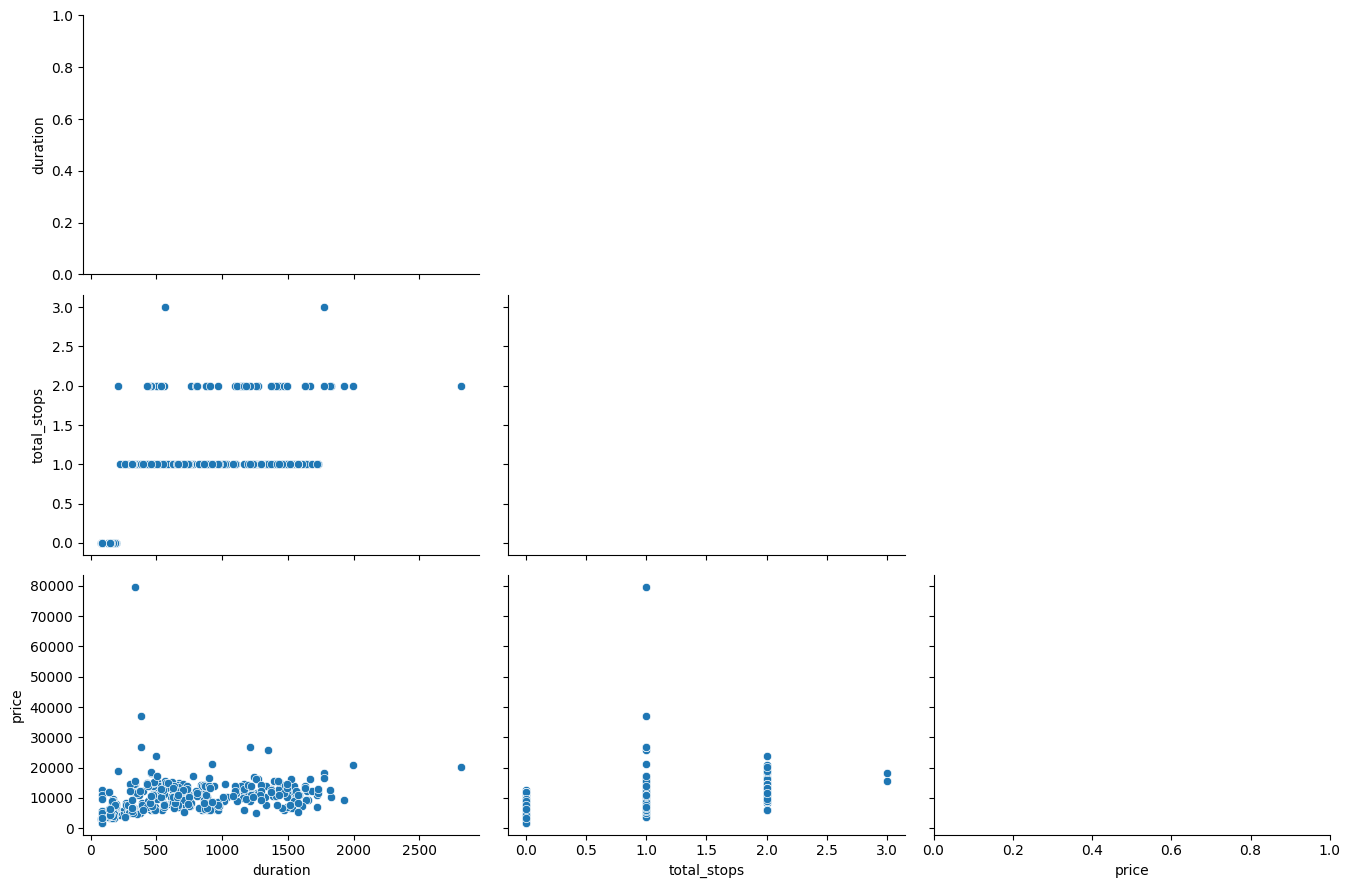

In [42]:
eda_helper_functions.pair_plots(train)

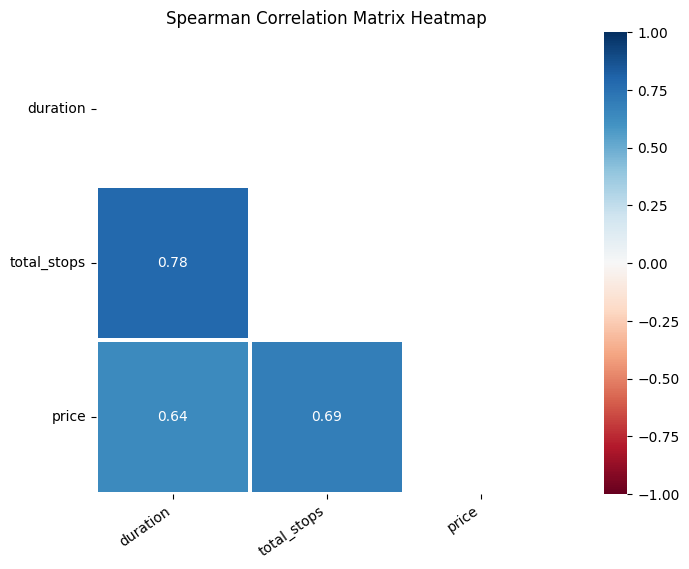

In [44]:
eda_helper_functions.correlation_heatmap(train)

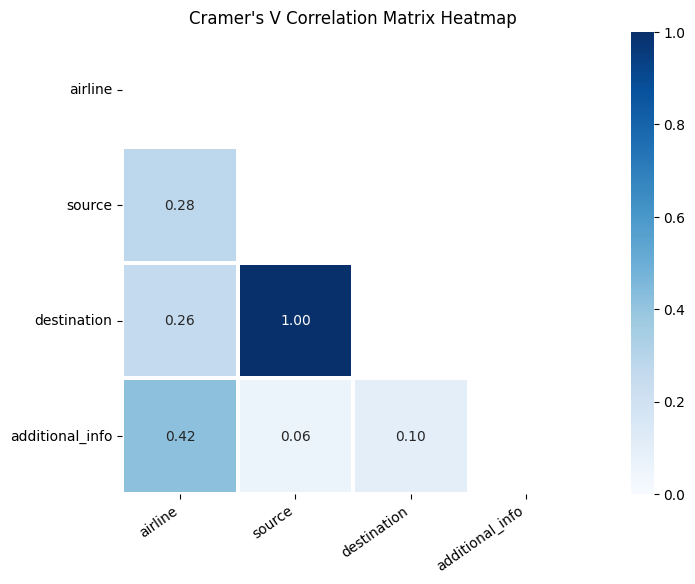

In [45]:
eda_helper_functions.cramersV_heatmap(train)

# Detailed Analysis

In [47]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

# 1. Airline

In [49]:
train.airline

0            Jet Airways
1                 Indigo
2                 Indigo
3            Jet Airways
4      Multiple Carriers
             ...        
413             Air Asia
414             Spicejet
415          Jet Airways
416          Jet Airways
417               Indigo
Name: airline, Length: 418, dtype: object

In [50]:
eda_helper_functions.cat_summary(train, "airline")

0            Jet Airways
1                 Indigo
2                 Indigo
3            Jet Airways
4      Multiple Carriers
             ...        
413             Air Asia
414             Spicejet
415          Jet Airways
416          Jet Airways
417               Indigo
Name: airline, Length: 418, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 418 / 418 rows


,
count,418
unique,8
top,Jet Airways
freq,153


,count,percentage
category,,
Jet Airways,153,0.366029
Air India,74,0.177033
Indigo,67,0.160287
Multiple Carriers,45,0.107656
Spicejet,31,0.074163
Vistara,28,0.066986
Air Asia,11,0.026316
Goair,9,0.021531


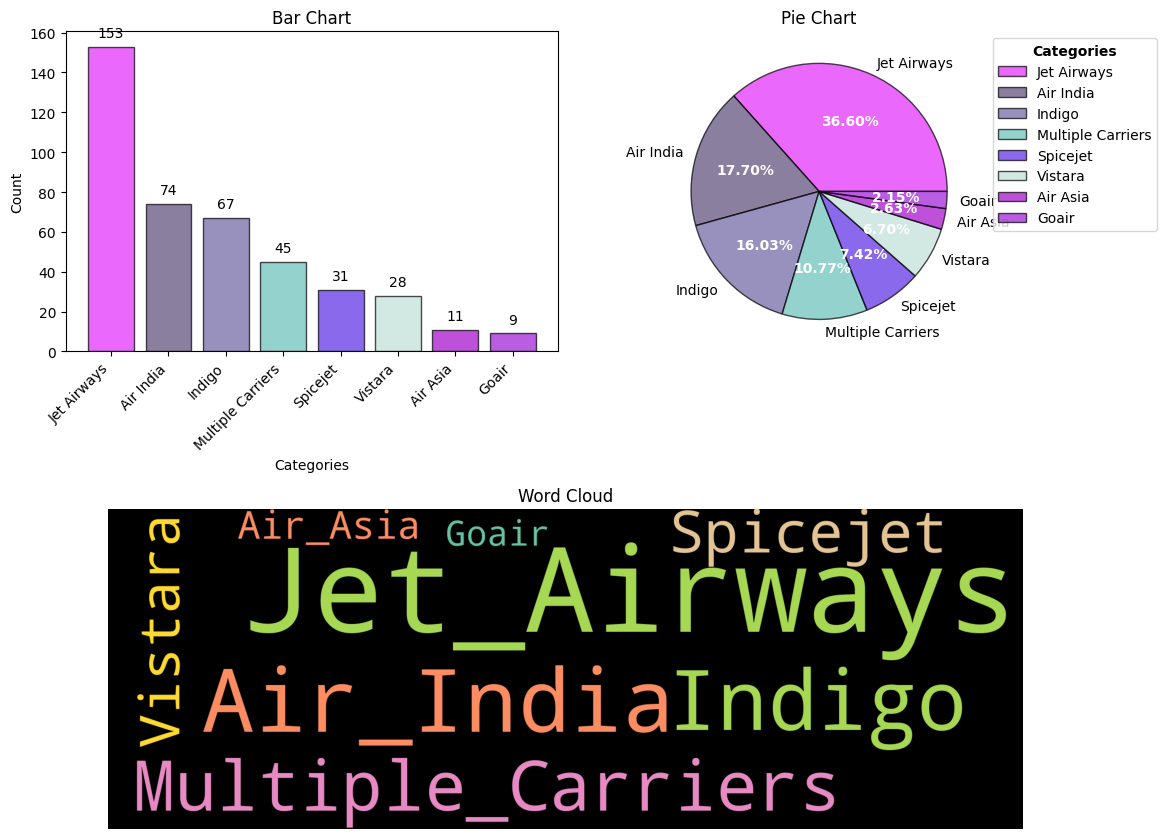

In [62]:
eda_helper_functions.cat_univar_plots(train, "airline")

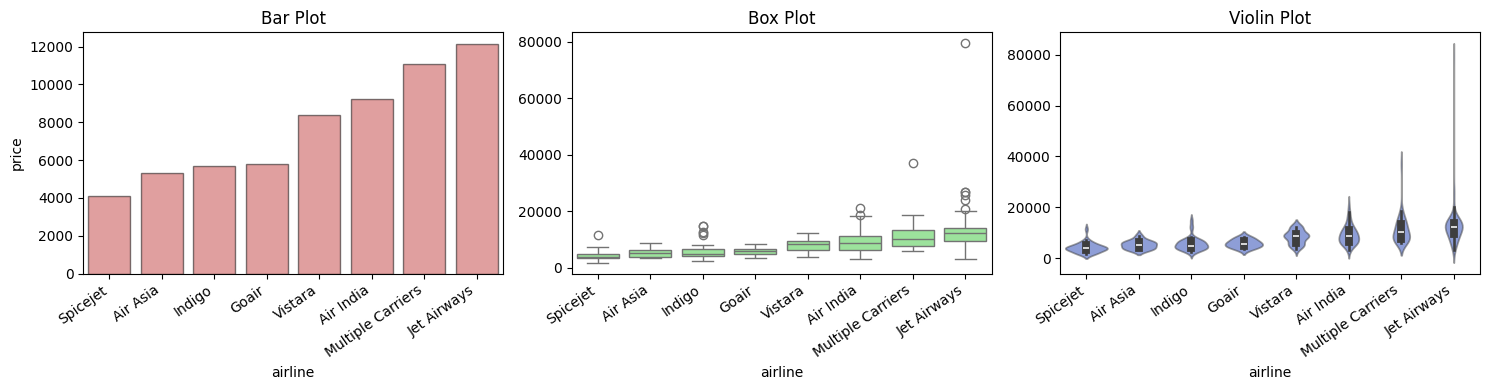

In [63]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var="price",
    cat_var="airline"
)

In [64]:
eda_helper_functions.num_cat_hyp_testing(data = train, num_var= "price", cat_var="airline", alpha= 0.05)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 19.505043589990375
- p-value              : 1.5343835243050896e-22
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 178.91313574142353
- p-value              : 3.304685471746451e-35
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


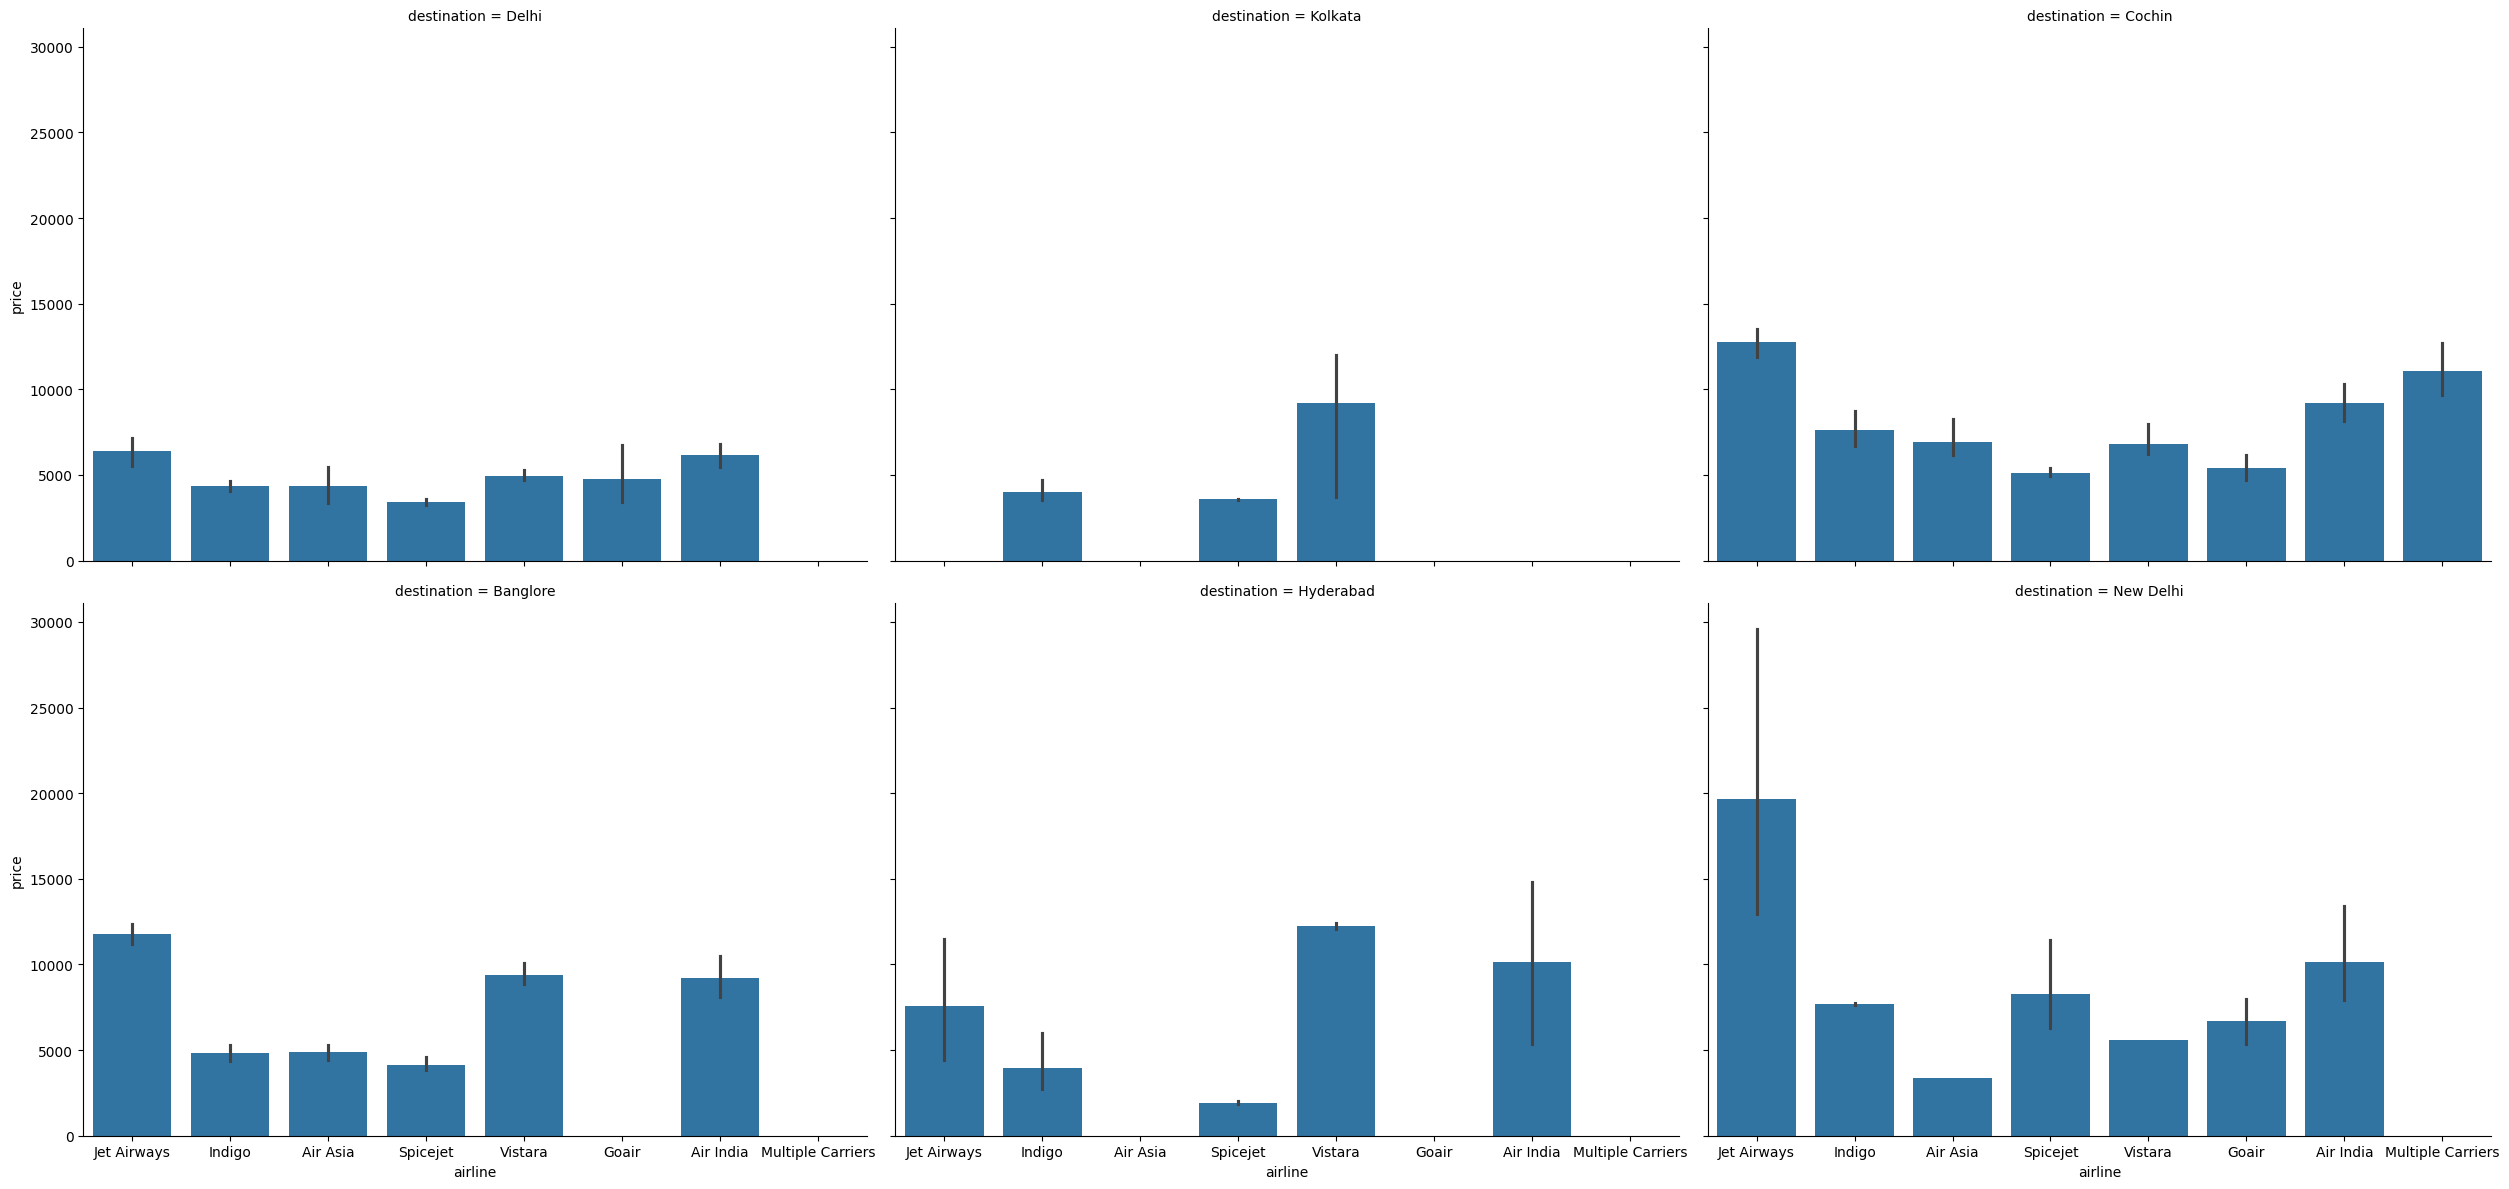

In [77]:
airline_grid = sns.FacetGrid(
    data= train,
    col="destination",
    col_wrap=3,
    height=6,
    aspect=1.4
)
airline_grid.map(sns.barplot, "airline", "price")

# 2. Date of Journey

In [78]:
train.date_of_journey

0     2019-06-21
1     2019-03-27
2     2019-03-27
3     2019-05-18
4     2019-06-12
         ...    
413   2019-04-12
414   2019-03-03
415   2019-05-18
416   2019-04-01
417   2019-05-06
Name: date_of_journey, Length: 418, dtype: datetime64[ns]

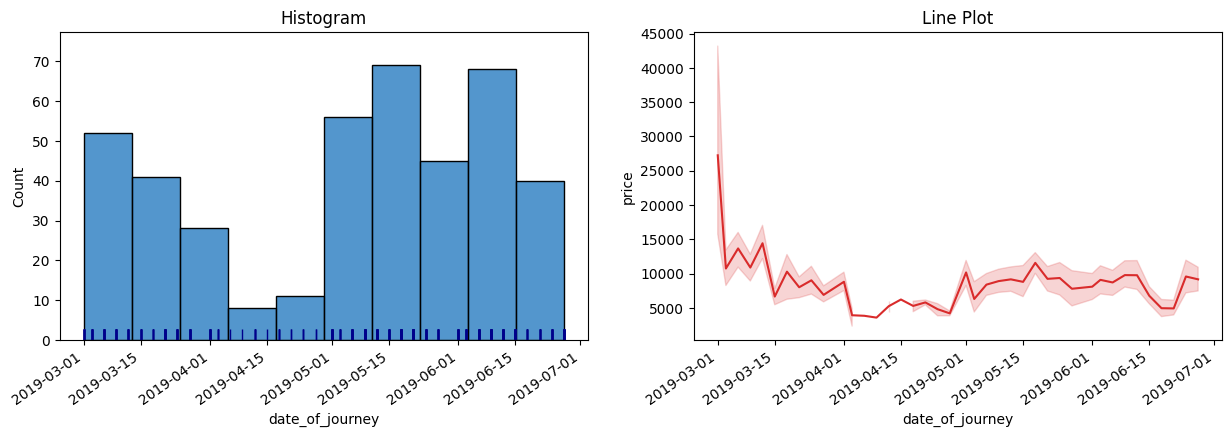

In [79]:
eda_helper_functions.dt_univar_plots(
    data = train,
    var = "date_of_journey",
    target="price"
)

<Axes: xlabel='Month'>

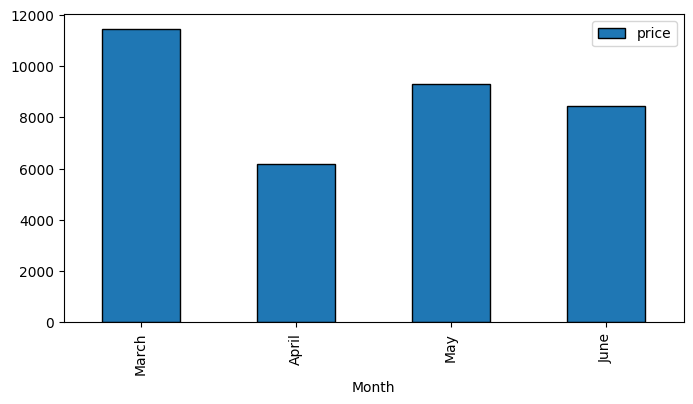

In [103]:
(
    train
    .groupby(pd.Grouper(key = "date_of_journey", freq = "M"))
    .price.mean()
    .to_frame()
    .set_axis(['March','April','May','June'],axis = 0)
    .rename_axis(index = "Month")
    .plot(
        kind = "bar",
        figsize = (8,4),
        edgecolor = "black"
    )
)

<Axes: xlabel='Week'>

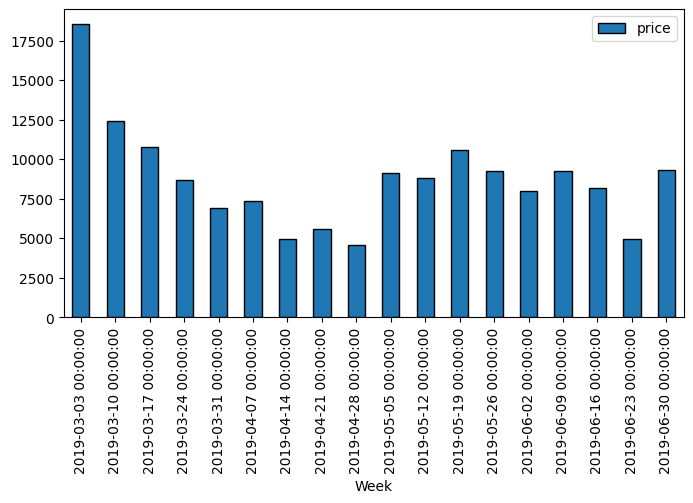

In [106]:
(
    train
    .groupby(pd.Grouper(key = "date_of_journey", freq = "W"))
    .price.mean()
    .to_frame()
    #.set_axis(['March','April','May','June'],axis = 0)
    .rename_axis(index = "Week")
    .plot(
        kind = "bar",
        figsize = (8,4),
        edgecolor = "black"
    )
)

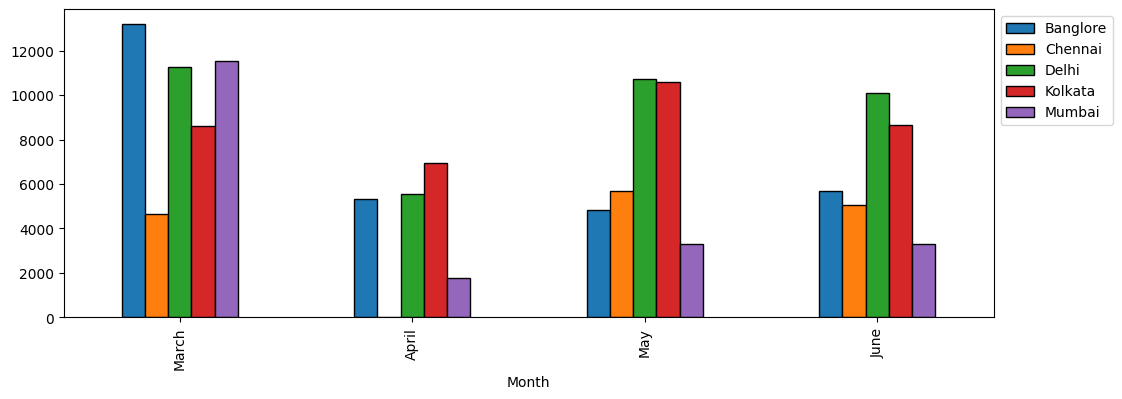

In [119]:
(
    train
    .groupby([pd.Grouper(key = "date_of_journey", freq = "M"), "source"])
    .price.mean()
    .unstack(fill_value = 0)
    .set_axis(['March','April','May','June'],axis = 0)
    .rename_axis(index = "Month")
    .plot(
        kind = "bar",
        figsize = (12,4),
        edgecolor = "black"
    )
)

ax = plt.gca()
ax.legend(
    loc = "upper left",
    bbox_to_anchor = (1,1)
)

# 3. Dep_Time

In [120]:
train.dep_time

0     2024-12-26 11:10:00
1     2024-12-26 14:40:00
2     2024-12-26 06:40:00
3     2024-12-26 09:35:00
4     2024-12-26 08:00:00
              ...        
413   2024-12-26 22:50:00
414   2024-12-26 17:15:00
415   2024-12-26 14:05:00
416   2024-12-26 18:55:00
417   2024-12-26 02:35:00
Name: dep_time, Length: 418, dtype: datetime64[ns]

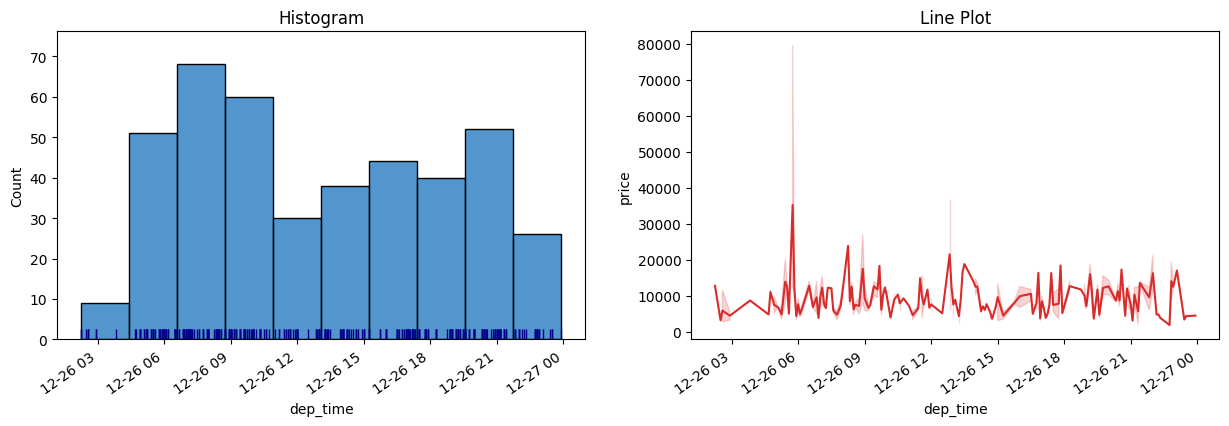

In [121]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

In [133]:
(
    train
    .dep_time
    .dt.hour
)

0      11
1      14
2       6
3       9
4       8
       ..
413    22
414    17
415    14
416    18
417     2
Name: dep_time, Length: 418, dtype: int32

In [132]:
(
    train
    .dep_time
    .dt.hour
    .pipe(lambda ser: pd.Series(np.select([ser.between(4,12, inclusive = "left"),
                                ser.between(12,16, inclusive = "left"),
                                ser.between(16,20, inclusive = "left")],
                               ["Morning", "Afternoon", "Evening"],
                               default="Night")))
)

0        Morning
1      Afternoon
2        Morning
3        Morning
4        Morning
         ...    
413        Night
414      Evening
415    Afternoon
416      Evening
417        Night
Length: 418, dtype: object

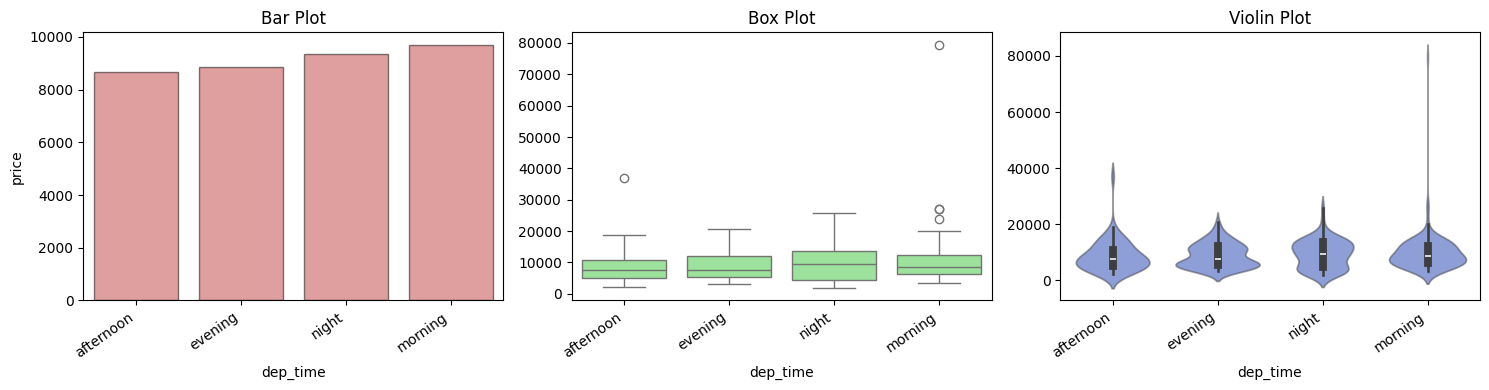

In [134]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)


# 4. Duration

In [136]:
train.duration

0       175
1       145
2       940
3      1730
4       675
       ... 
413     150
414     150
415    1575
416    1720
417      90
Name: duration, Length: 418, dtype: int64

In [137]:
eda_helper_functions.num_summary(train, "duration")

0       175
1       145
2       940
3      1730
4       675
       ... 
413     150
414     150
415    1575
416    1720
417      90
Name: duration, Length: 418, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 418 / 418 rows


,value
percentile,
0,80.00
5,90.00
10,145.00
25,170.00
50,510.00
75,938.75
90,1476.50
95,1580.75
99,1812.35


,value
mean,651.758373
trimmed mean (5%),621.600529
trimmed mean (10%),595.997024
median,510.000000


,value
var,258929.934282
std,508.851584
IQR,768.750000
mad,345.000000
coef_variance,0.780737


,value
skewness,0.839265
kurtosis,-0.048981


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.9111793953251074e-16
Test Statistic       : 0.8937106725094338
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.78
Test Statistic       : 14.199190454327208
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


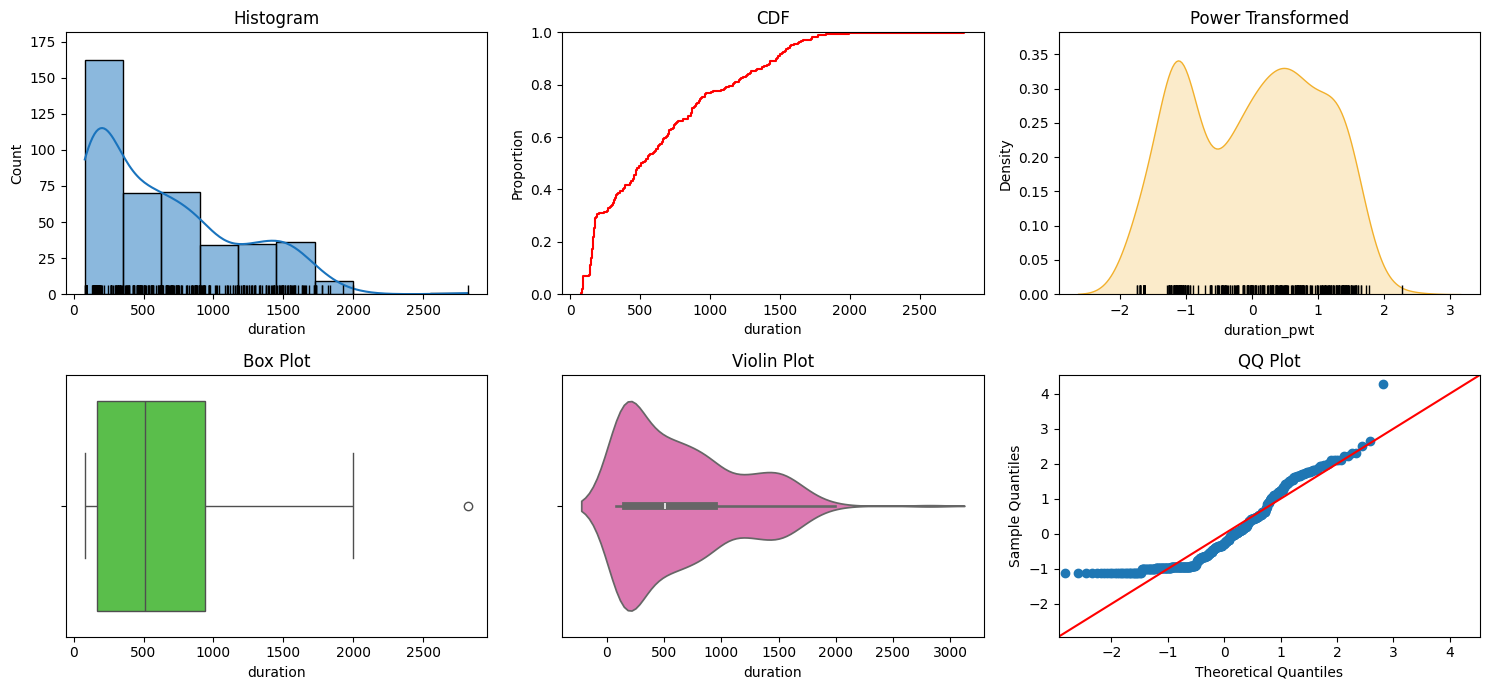

In [138]:
eda_helper_functions.num_univar_plots(train, "duration")

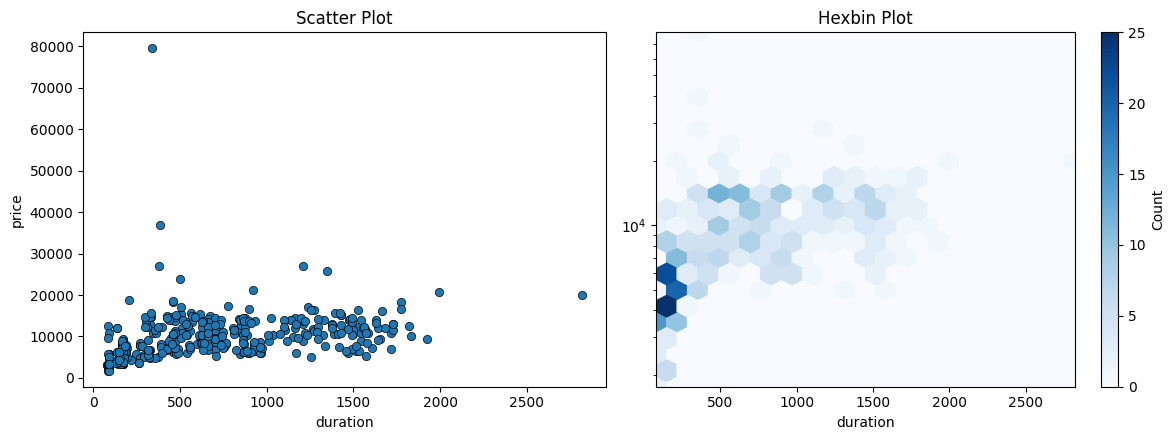

In [140]:
eda_helper_functions.num_bivar_plots(train, "duration", "price", hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	))

In [141]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.38422234350498474
- p-value              : 3.738855998587468e-16
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6397922369734923
- p-value              : 1.6738667123693993e-49
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


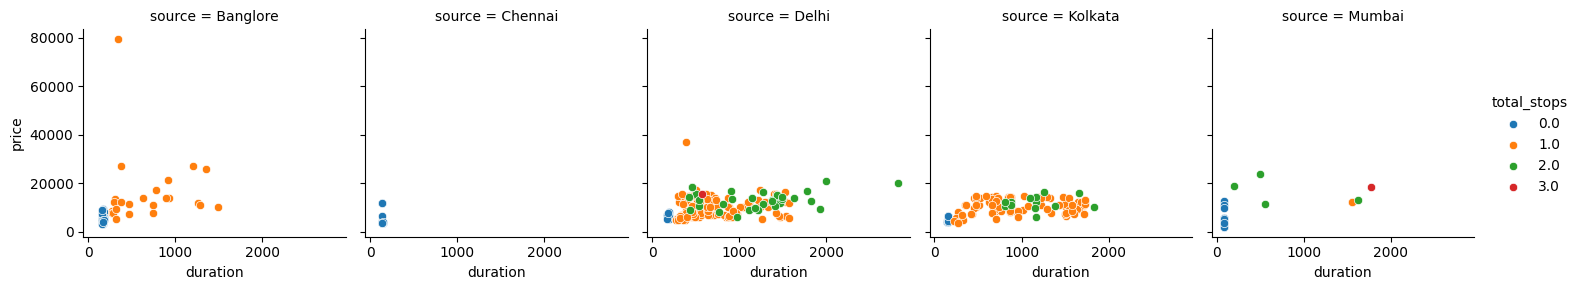

In [142]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [143]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -983.125
Upper Limit : 2091.875


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
327,Jet Airways,2019-03-03,Delhi,Cochin,2024-12-26 05:25:00,2024-12-26 04:25:00,2820,2.0,No Info,20064
